In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_small.csv")

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

print(df[['type', 'date_added', 'duration', 'duration_num']].head())
print(df.head())


      type date_added   duration  duration_num
0    Movie 2010-09-01    148 min         148.0
1  TV Show 2016-07-15  3 Seasons           3.0
2    Movie 2019-11-27    209 min         209.0
3  TV Show 2017-12-01  3 Seasons           3.0
4    Movie 2020-09-09     94 min          94.0
  show_id     type               title             director  \
0      s1    Movie           Inception    Christopher Nolan   
1      s2  TV Show     Stranger Things  The Duffer Brothers   
2      s3    Movie        The Irishman      Martin Scorsese   
3      s4  TV Show                Dark        Baran bo Odar   
4      s5    Movie  The Social Dilemma        Jeff Orlowski   

                               cast  country date_added  release_year rating  \
0                 Leonardo DiCaprio      USA 2010-09-01          2010  PG-13   
1  Millie Bobby Brown, Winona Ryder      USA 2016-07-15          2016  TV-14   
2         Robert De Niro, Al Pacino      USA 2019-11-27          2019      R   
3  Louis Hofmann, K

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


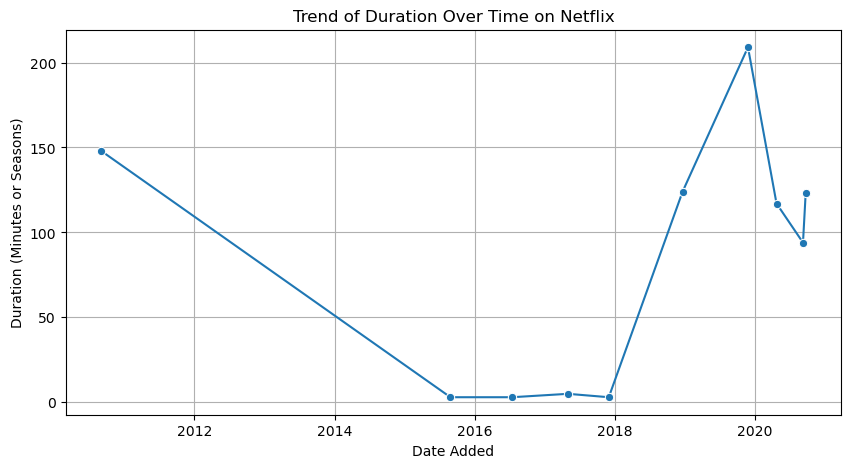

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='date_added', y='duration_num', marker='o')

plt.title("Trend of Duration Over Time on Netflix")
plt.xlabel("Date Added")
plt.ylabel("Duration (Minutes or Seasons)")
plt.grid(True)
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


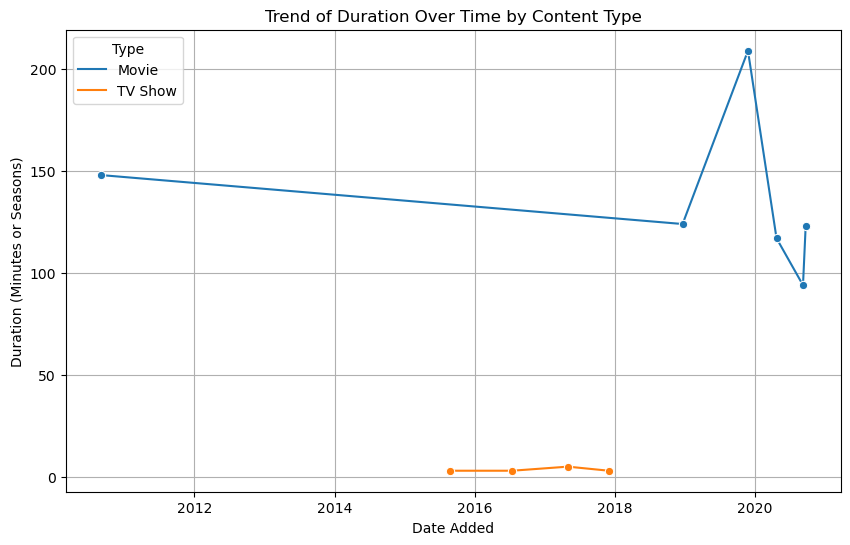

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date_added', y='duration_num', hue='type', marker='o')

plt.title("Trend of Duration Over Time by Content Type")
plt.xlabel("Date Added")
plt.ylabel("Duration (Minutes or Seasons)")
plt.grid(True)
plt.legend(title="Type")
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


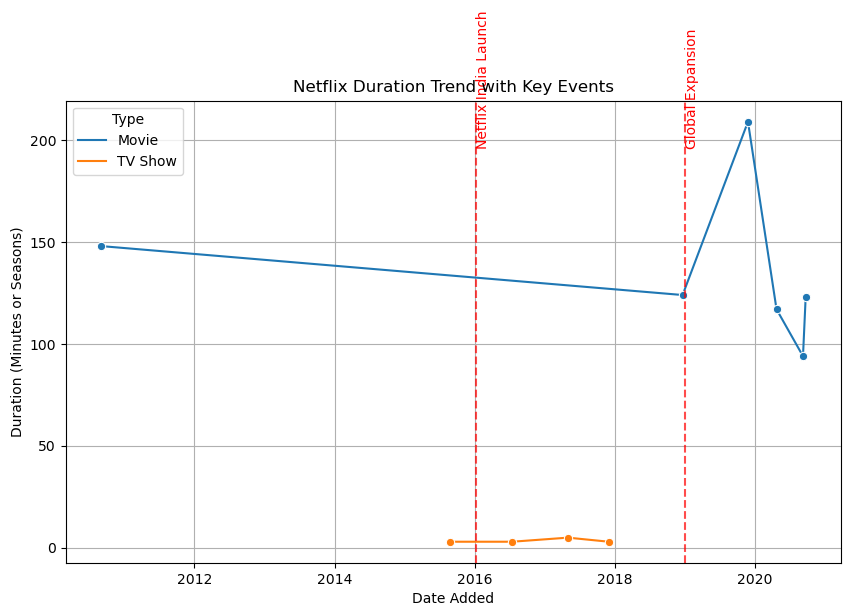

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date_added', y='duration_num', hue='type', marker='o')

plt.title("Netflix Duration Trend with Key Events")
plt.xlabel("Date Added")
plt.ylabel("Duration (Minutes or Seasons)")
plt.grid(True)
plt.legend(title="Type")

# Add vertical lines for key events
events = {
    'Netflix India Launch': '2016-01-06',
    'Global Expansion': '2019-01-01'
}

for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime(date), plt.ylim()[1]*0.9, event, rotation=90, color='red')

plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


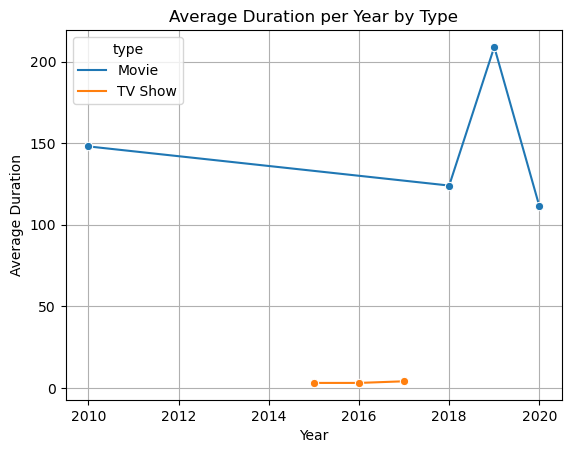

In [8]:
df['year'] = df['date_added'].dt.year
avg_duration = df.groupby(['year', 'type'])['duration_num'].mean().reset_index()

sns.lineplot(data=avg_duration, x='year', y='duration_num', hue='type', marker='o')
plt.title("Average Duration per Year by Type")
plt.xlabel("Year")
plt.ylabel("Average Duration")
plt.grid(True)
plt.show()



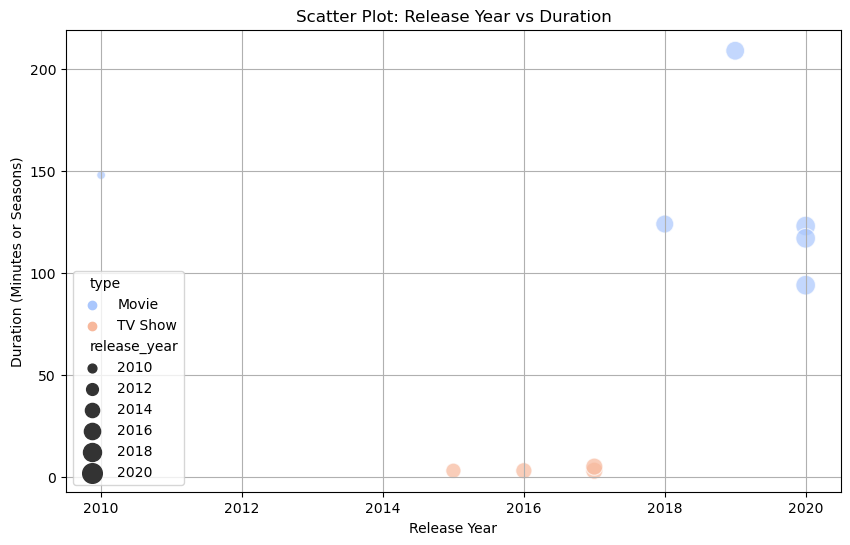

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='release_year',
    y='duration_num',
    hue='type',
    size='release_year',
    palette='coolwarm',
    sizes=(40,200),
    alpha=0.7
)
plt.title("Scatter Plot: Release Year vs Duration")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes or Seasons)")
plt.grid(True)
plt.show()



<Figure size 1000x600 with 0 Axes>

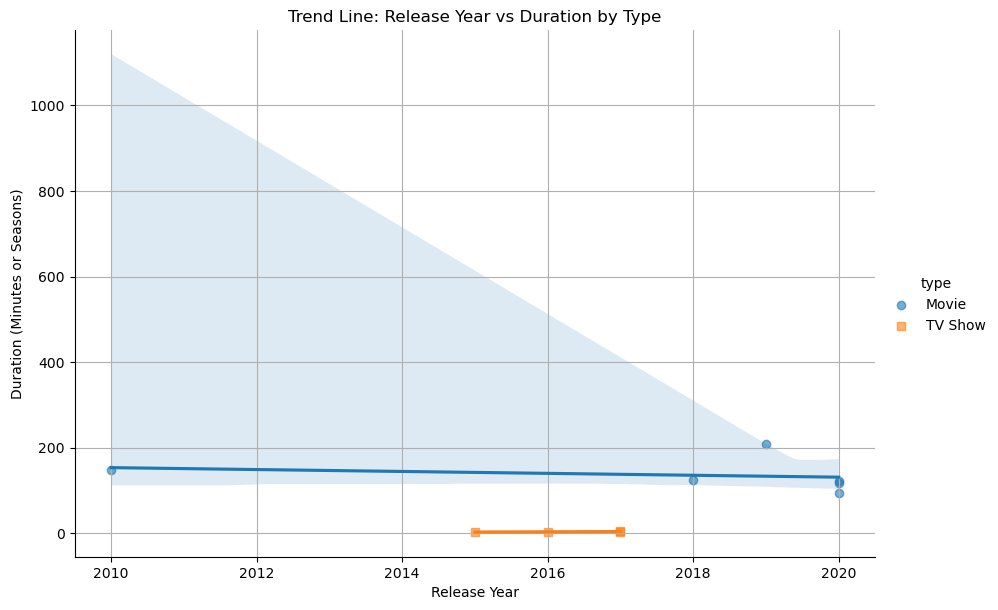

In [10]:
plt.figure(figsize=(10,6))
sns.lmplot(
    data=df,
    x='release_year',
    y='duration_num',
    hue='type',
    height=6,
    aspect=1.5,
    markers=['o','s'],
    scatter_kws={'alpha':0.6}
)
plt.title("Trend Line: Release Year vs Duration by Type")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes or Seasons)")
plt.grid(True)
plt.show()


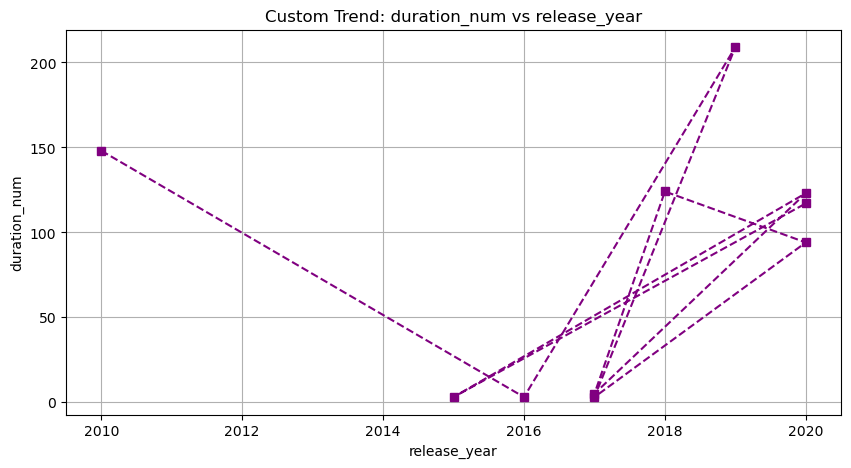

In [11]:
def custom_plot(df, x_col, y_col, color='blue', linestyle='-', marker='o', xscale='linear', yscale='linear'):
    plt.figure(figsize=(10,5))
    plt.plot(df[x_col], df[y_col], color=color, linestyle=linestyle, marker=marker)
    plt.title(f"Custom Trend: {y_col} vs {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.grid(True)
    plt.show()

# Example:
custom_plot(df, 'release_year', 'duration_num', color='purple', linestyle='--', marker='s', xscale='linear', yscale='linear')


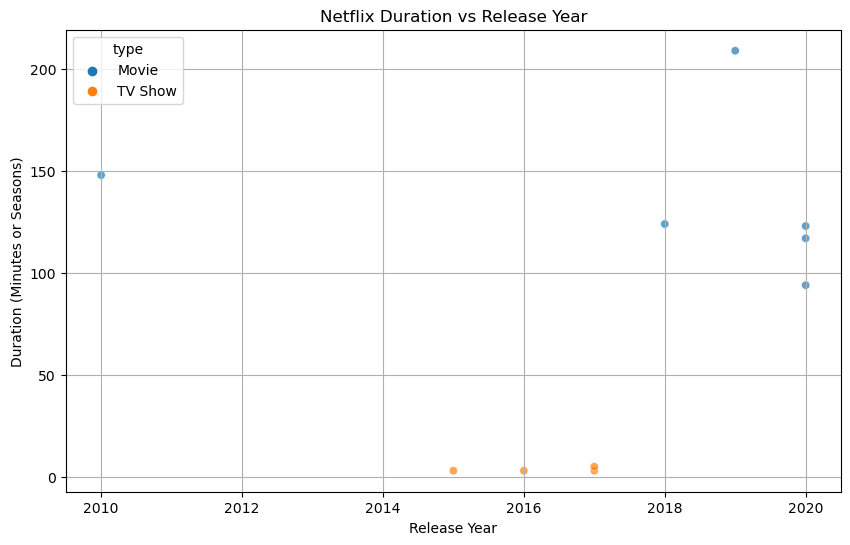

Plot saved as PNG and PDF


In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='release_year', y='duration_num', hue='type', alpha=0.7)
plt.title("Netflix Duration vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes or Seasons)")
plt.grid(True)

# Save plot
plt.savefig("netflix_scatter_plot.png", dpi=300, bbox_inches='tight')
plt.savefig("netflix_scatter_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved as PNG and PDF")


In [14]:
import pandas as pd
from openpyxl import load_workbook

# Summary statistics
summary_stats = df.describe(include='all')

# Create Excel writer
with pd.ExcelWriter("netflix_dashboard.xlsx", engine='openpyxl') as writer:
    summary_stats.to_excel(writer, sheet_name='Summary_Stats')
    df.to_excel(writer, sheet_name='Full_Data', index=False)
print(" Dashboard Excel created successfully")


 Dashboard Excel created successfully
